In [2]:
import pandas as pd
import numpy as np
import os 
from glob import glob
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from shapely.geometry import Point             # Imported for constraint checking
from shapely.geometry.polygon import Polygon
from   math   import radians as DegToRad       # Degrees to radians Conversion



In [3]:
#store here the directory where the files of wind data are present
data_folder = '/home/hardik/shell.ai hackathon/resources/Shell_Hackathon Dataset/custom_datasets'
# all the files in the folder
files = glob(os.path.join(data_folder + '/*.csv'))

In [4]:
def plot_turbines(X,Y):
    plt.figure(figsize = (10,8))
    plt.plot([50,3950,3950,50,50],[50,50,3950,3950,50],linestyle = '--',c = 'r')
    plt.scatter(X,Y,s = 100,marker = '*')
    
    
def save_df(X,Y,name):
    df = pd.DataFrame({'x':X,'y':Y})
    df.to_csv('new_custom_datasets/'+name + '.csv',index = False)
    
import numpy as np
def rotate(point, origin, degrees):
    radians = np.deg2rad(degrees)
    x,y = point
    offset_x, offset_y = origin
    adjusted_x = (x - offset_x)
    adjusted_y = (y - offset_y)
    cos_rad = np.cos(radians)
    sin_rad = np.sin(radians)
    qx = offset_x + cos_rad * adjusted_x + sin_rad * adjusted_y
    qy = offset_y + -sin_rad * adjusted_x + cos_rad * adjusted_y
    return qx, qy

def rotate_points(array_points,ref_point,deg):
    rotated_points = []
    for point in array_points:
        rotated_points.append(rotate(point,ref_point,deg))

    rotated_points = np.array(rotated_points)
    return rotated_points    

In [5]:
    
def checkConstraints(turb_coords, turb_diam = 100):
    """
    -**-THIS FUNCTION SHOULD NOT BE MODIFIED-**-
    
    Checks if the turbine configuration satisfies the two
    constraints:(i) perimeter constraint,(ii) proximity constraint 
    Prints which constraints are violated if any. Note that this 
    function does not quantifies the amount by which the constraints 
    are violated if any. 
    
    :called from
        main 
        
    :param
        turb_coords - 2d np array containing turbine x,y coordinates
        turb_diam   - Diameter of the turbine (m)
    
    :return
        None. Prints messages.   
    """
    bound_clrnc      = 50
    prox_constr_viol = False
    peri_constr_viol = False
    points = []

    # create a shapely polygon object of the wind farm
    farm_peri = [(0, 0), (0, 4000), (4000, 4000), (4000, 0)]
    farm_poly = Polygon(farm_peri)
    
    # checks if for every turbine perimeter constraint is satisfied. 
    # breaks out if False anywhere
    for turb in turb_coords:
        np_point = turb
        turb = Point(turb)
        inside_farm   = farm_poly.contains(turb)
        correct_clrnc = farm_poly.boundary.distance(turb) >= bound_clrnc
        if (inside_farm == False or correct_clrnc == False):
            peri_constr_viol = True
            points.append(np_point)
            
    
    # checks if for every turbines proximity constraint is satisfied. 
    # breaks out if False anywhere
    for i,turb1 in enumerate(turb_coords):
        for turb2 in np.delete(turb_coords, i, axis=0):
            if  np.linalg.norm(turb1 - turb2) < 4*turb_diam:
                prox_constr_viol = True
                points.append([turb1,turb2])
                
    
    # print messages
    if  peri_constr_viol  == True  and prox_constr_viol == True:
          print('Somewhere both perimeter constraint and proximity constraint are violated\n')
    elif peri_constr_viol == True  and prox_constr_viol == False:
          print('Somewhere perimeter constraint is violated\n')
    elif peri_constr_viol == False and prox_constr_viol == True:
          print('Somewhere proximity constraint is violated\n')
    else: print('Both perimeter and proximity constraints are satisfied !!\n')
        
    return points

# Pattern 1

(50, 2)


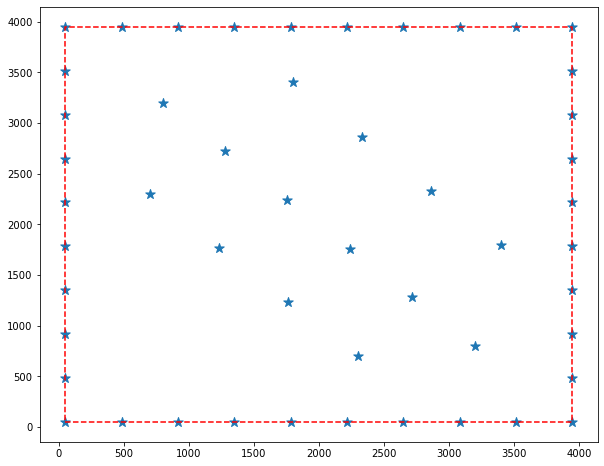

In [6]:

data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[i,4000 - i] for i in np.linspace(800,3200,6)])
data6 = np.array([[i,3000 - i] for i in np.linspace(700,2300,4)])
data7 = np.array([[i,5200 - i] for i in np.linspace(1800,3400,4)])

data = np.concatenate([data1,data2,data3,data4,data5,data6,data7]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

In [7]:
speeds = [20.      , 18.996809, 18.696331, 18.519323, 18.402393, 18.32032 ,
       18.260363, 18.215254, 18.180525, 18.153278, 20.      , 20.      ,
       20.      , 20.      , 20.      , 20.      , 20.      , 20.      ,
       20.      , 18.996809, 18.696331, 18.519323, 18.402393, 18.32032 ,
       18.260363, 18.215254, 18.180525, 19.306036, 18.883863, 19.058796,
       18.749172, 18.956856, 19.09006 , 19.20029 , 19.278486, 18.153278,
       19.014174, 19.082302, 19.060043, 19.020805, 19.278954, 19.12583 ,
       19.286007, 19.396515, 19.26591 , 19.087818, 19.025158, 18.904293,
       18.953524, 19.011202]

In [8]:
    
def plot_turbines3(points,n):
    plt.figure(figsize = (12,8))
    X = points[:,0]
    Y = points[:,1]
    
    plt.plot([50,3950,3950,50,50],[50,50,3950,3950,50],linestyle = '--',c = 'r')
    plt.scatter(X,Y,s = 100,marker = '*')
        
    for i, txt in enumerate(n):
        plt.annotate(txt, (X[i], Y[i]))

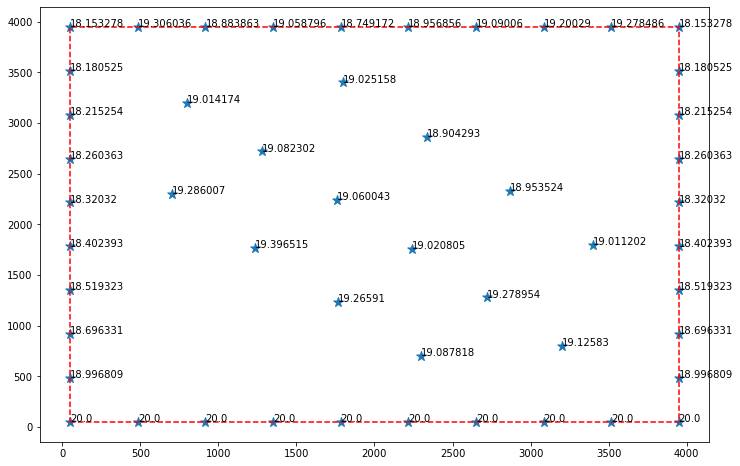

In [9]:
plot_turbines3(data,speeds)

(19, 2)


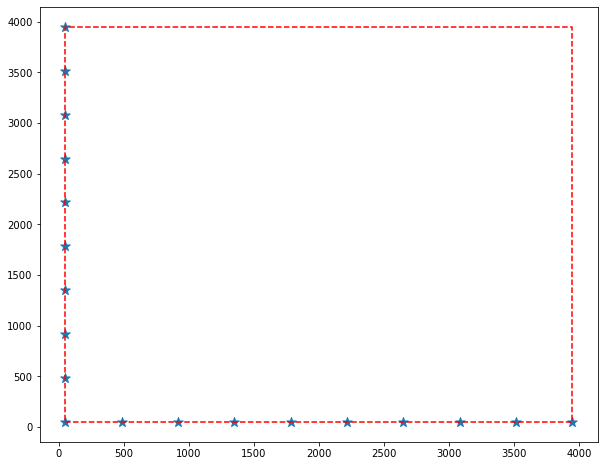

In [7]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[i,4000 - i] for i in np.linspace(800,3200,6)])
data6 = np.array([[i,3000 - i] for i in np.linspace(700,2300,4)])
data7 = np.array([[i,5200 - i] for i in np.linspace(1800,3400,4)])

data = np.concatenate([data1,data2]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

### hacker earth = 544.22

In [55]:
save_df(data[:,0],data[:,1],'wake1')

checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

# Pattern 2

(50, 2)


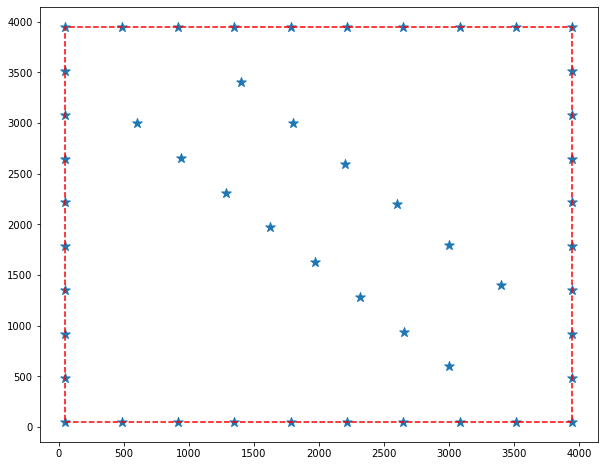

In [82]:

data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[i,4800 - i] for i in np.linspace(1400,3400,6)])
data6 = np.array([[i,3600 - i] for i in np.linspace(600,3000,8)])



data = np.concatenate([data1,data2,data3,data4,data5,data6]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

### hackerearth = 542.73

In [83]:
save_df(data[:,0],data[:,1],'wake2')

checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

# Pattern 3

(50, 2)


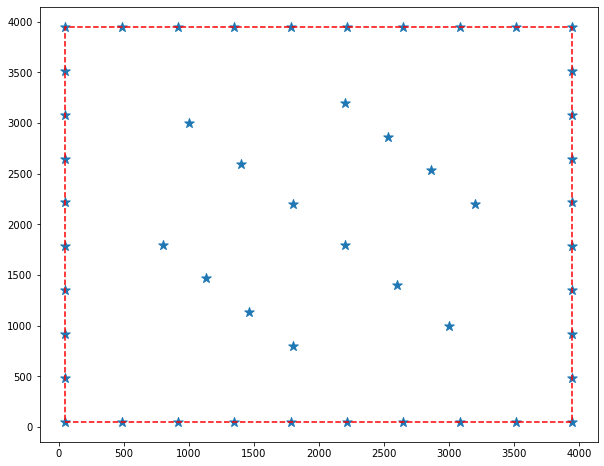

In [46]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[i,4000 - i] for i in np.linspace(1000,3000,6)])
data6 = np.array([[i,2600 - i] for i in np.linspace(800,1800,4)])
data7 = np.array([[i,5400 - i] for i in np.linspace(2200,3200,4)])

data = np.concatenate([data1,data2,data3,data4,data5,data6,data7]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

In [17]:
save_df(data[:,0],data[:,1],'wake3')

checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

# Rotated patterns

(14, 2)


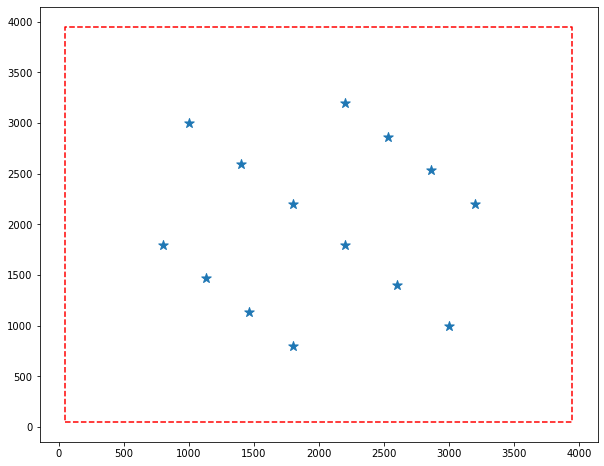

In [95]:
data5 = np.array([[i,4000 - i] for i in np.linspace(1000,3000,6)])
data6 = np.array([[i,2600 - i] for i in np.linspace(800,1800,4)])
data7 = np.array([[i,5400 - i] for i in np.linspace(2200,3200,4)])

middle_points = np.concatenate([data5,data6,data7]) 

print(middle_points.shape)
plot_turbines(middle_points[:,0],middle_points[:,1])

In [5]:
import numpy as np
def rotate(point, origin, degrees):
    radians = np.deg2rad(degrees)
    x,y = point
    offset_x, offset_y = origin
    adjusted_x = (x - offset_x)
    adjusted_y = (y - offset_y)
    cos_rad = np.cos(radians)
    sin_rad = np.sin(radians)
    qx = offset_x + cos_rad * adjusted_x + sin_rad * adjusted_y
    qy = offset_y + -sin_rad * adjusted_x + cos_rad * adjusted_y
    return qx, qy

In [6]:
def rotate_points(array_points,ref_point,deg):
    rotated_points = []
    for point in array_points:
        rotated_points.append(rotate(point,ref_point,deg))

    rotated_points = np.array(rotated_points)
    return rotated_points

In [98]:
rotated_points = rotate_points(middle_points,(2000,2000),30)
print(rotated_points.shape)

(14, 2)


In [99]:
middle_points.shape

(14, 2)

# Get rotated points

(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)


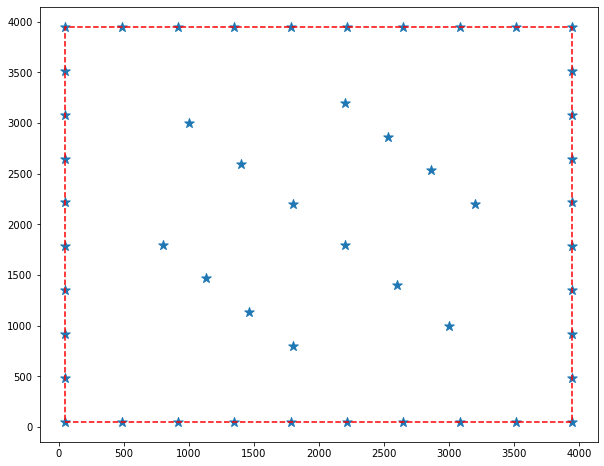

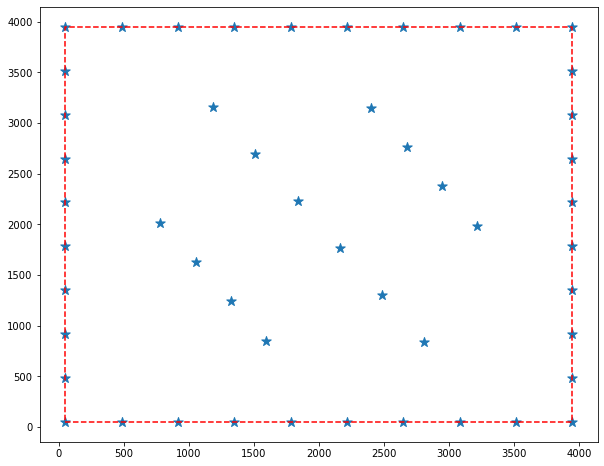

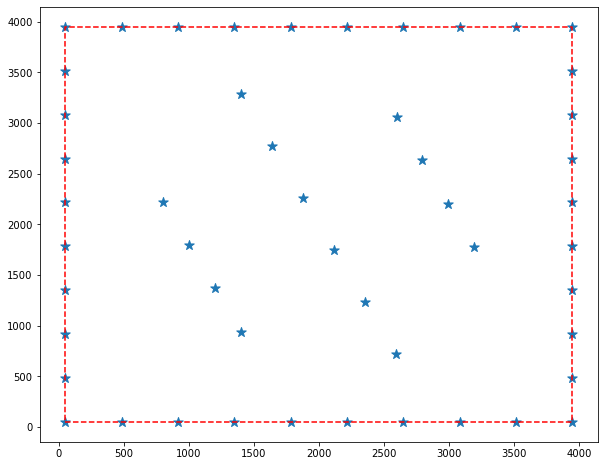

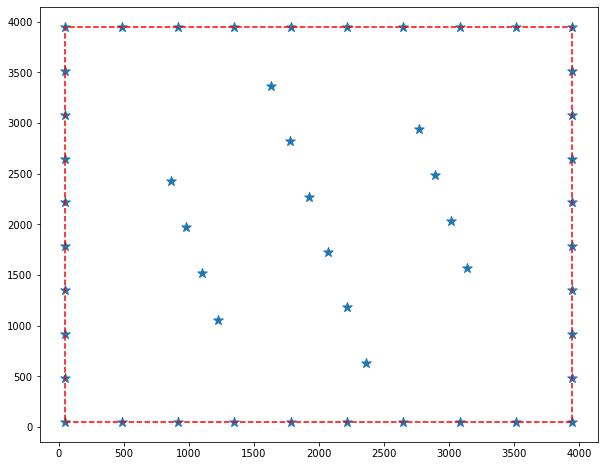

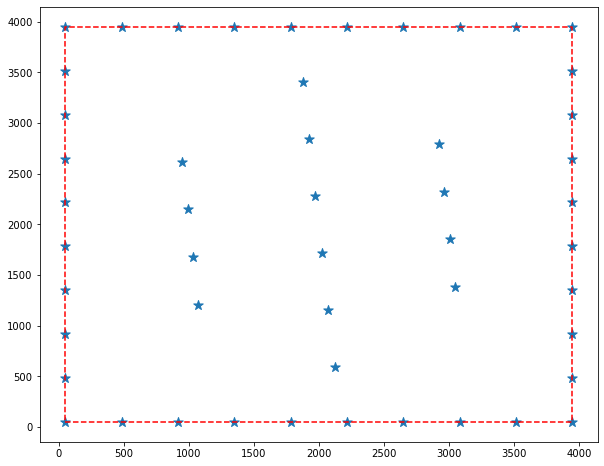

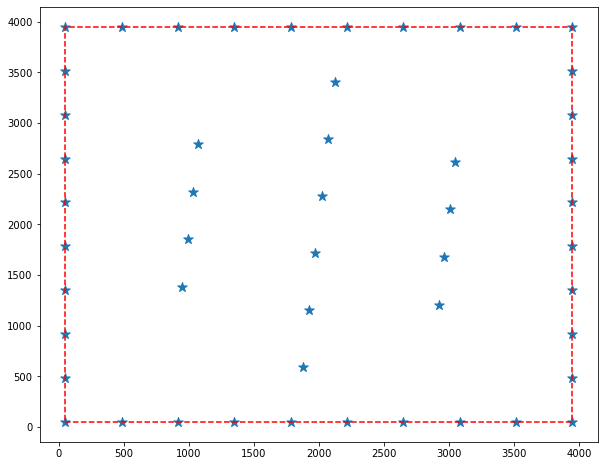

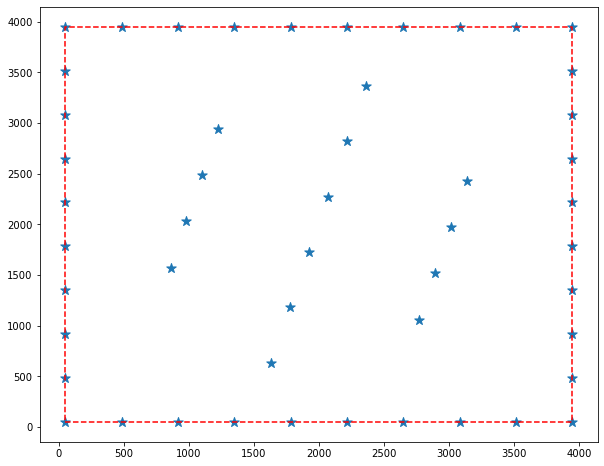

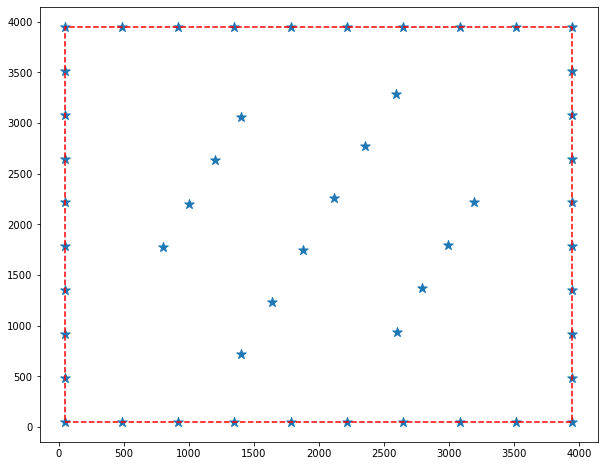

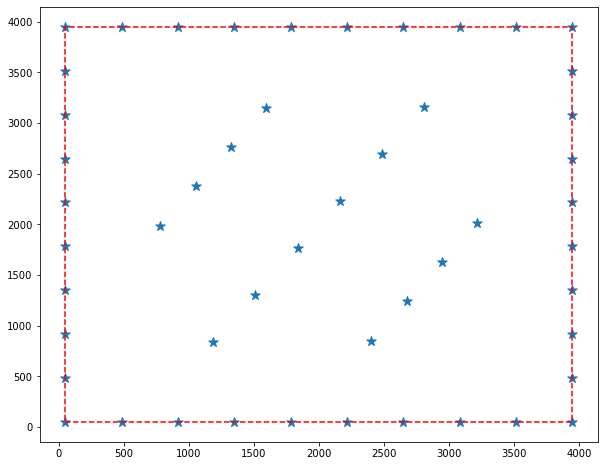

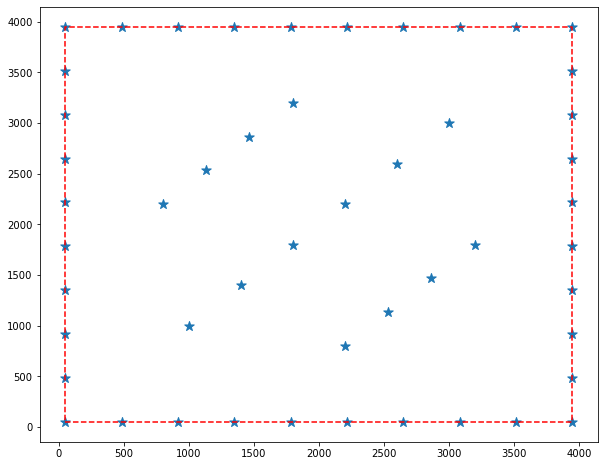

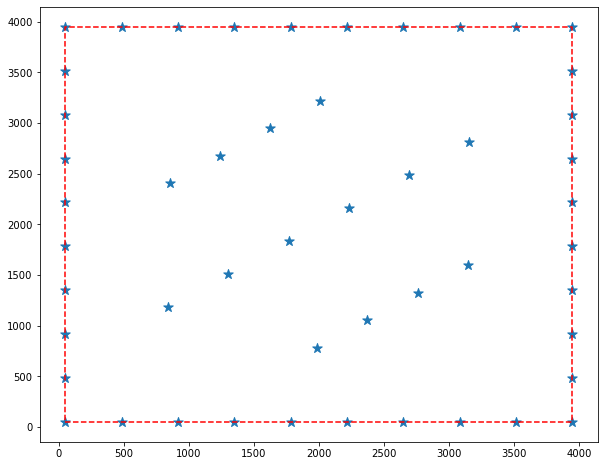

In [104]:
for angle in np.arange(0,101,10):    
    data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
    data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
    data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
    data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])

    rotated_points = rotate_points(middle_points,(2000,2000),angle)
    data = np.concatenate([data1,data2,data3,data4,rotated_points]) 
    print(data.shape)
    
    # save the dataframe
    save_df(data[:,0],data[:,1],'rotated' + str(angle))

    plot_turbines(data[:,0],data[:,1])

# Rotating the best structure so far 
## The one which got AEP - 545.45

(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)


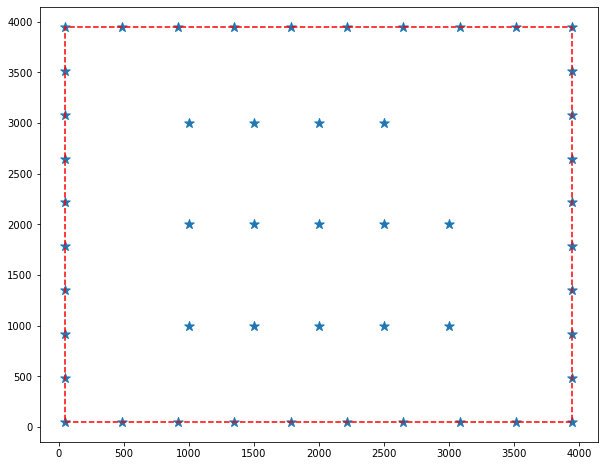

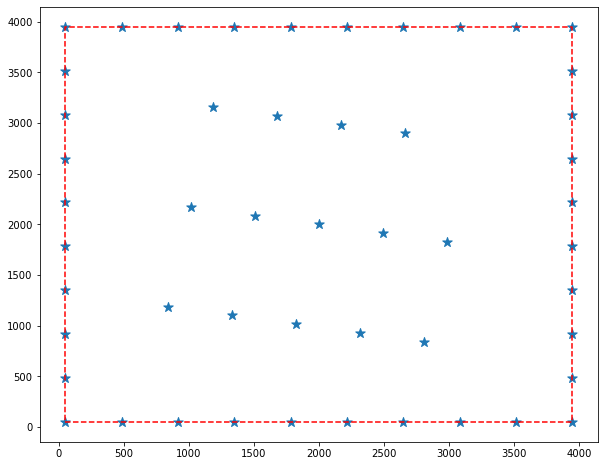

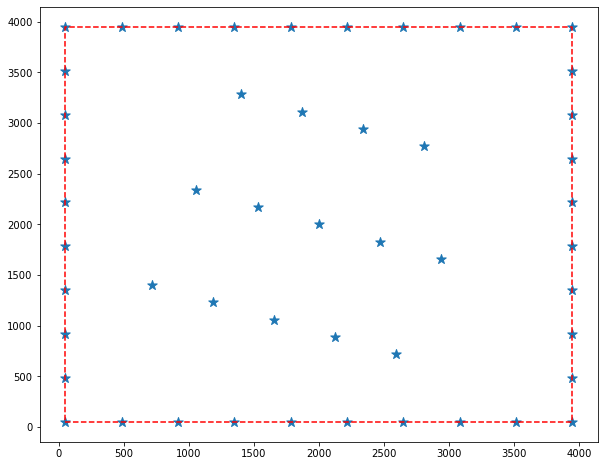

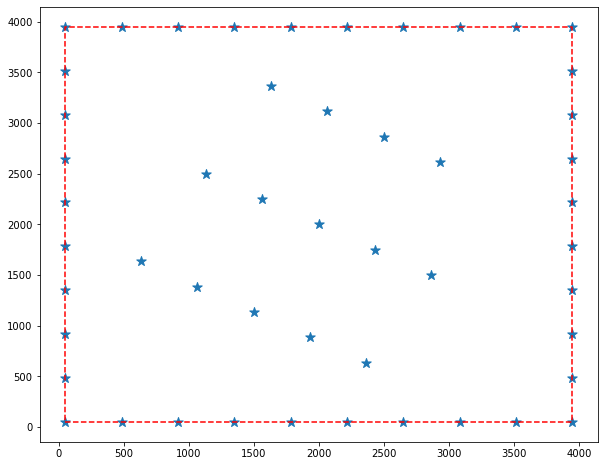

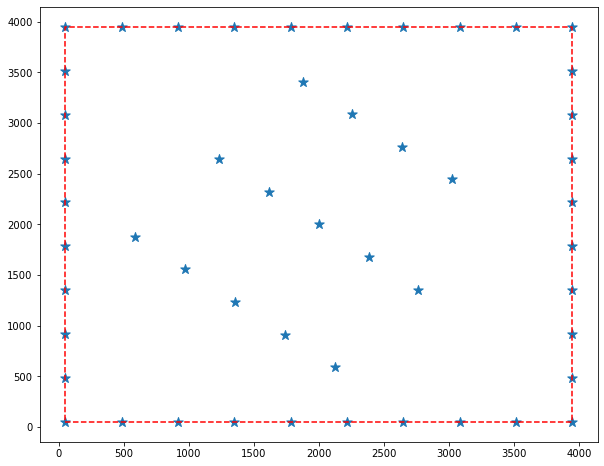

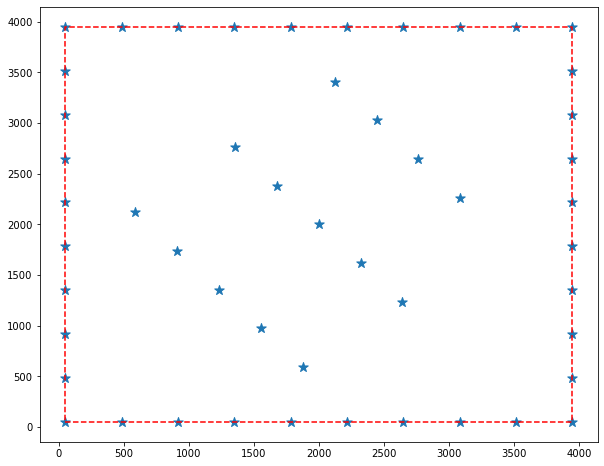

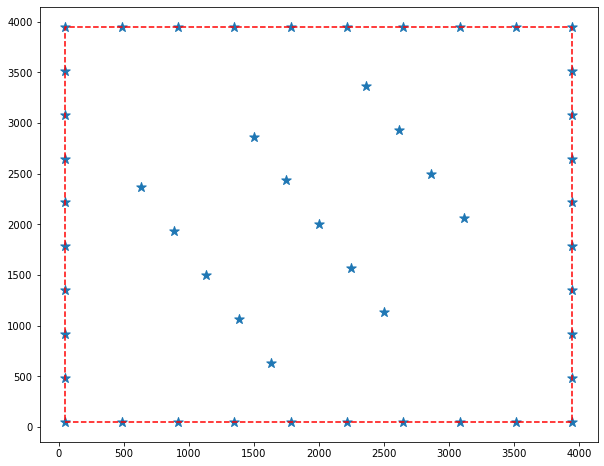

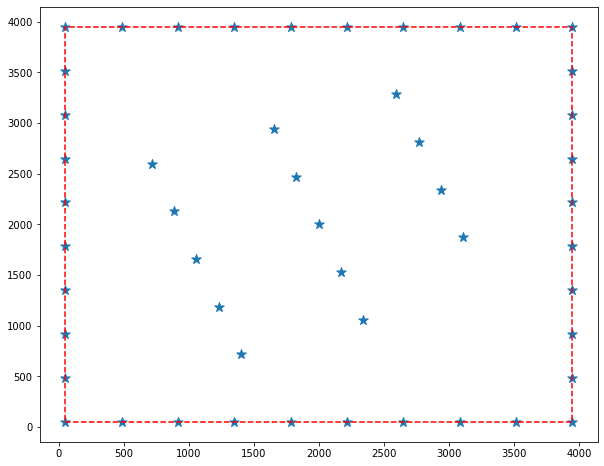

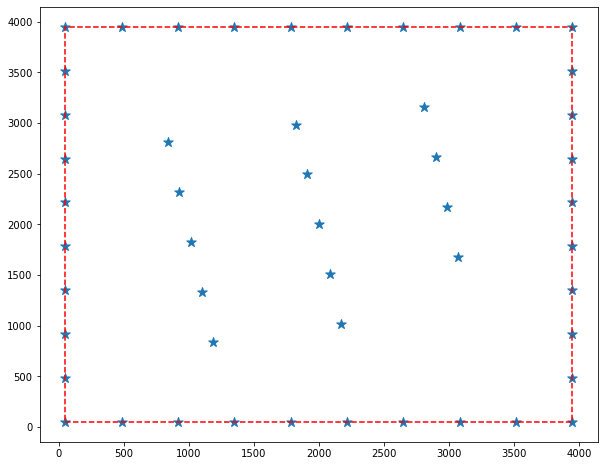

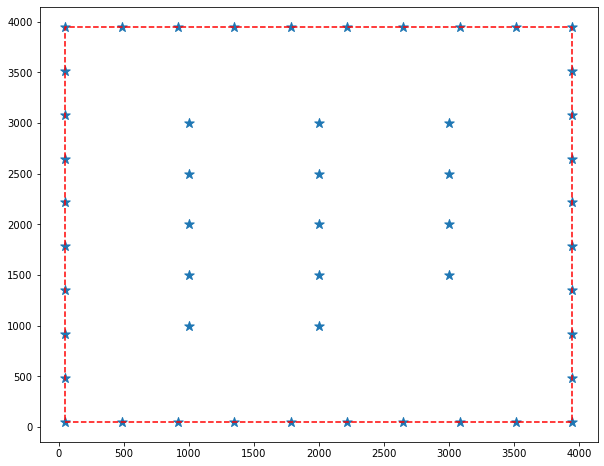

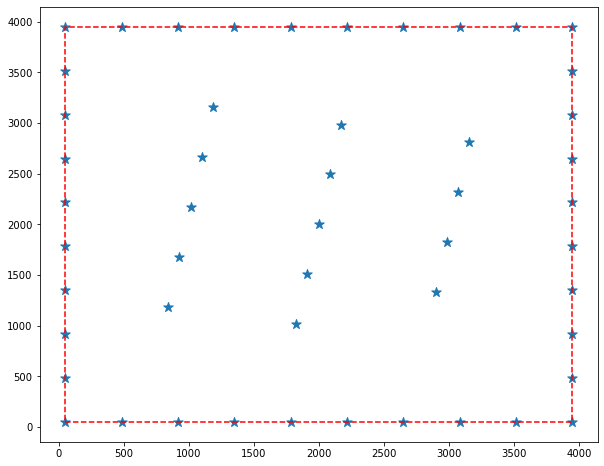

In [110]:
for angle in np.arange(0,101,10):    
    
    data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
    data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
    data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
    data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
    middle_points  = np.array([[i,j] for i in np.linspace(1000,3000,5) for j in [1000,2000,3000]])[:-1]
    rotated_middle = rotate_points(middle_points,(2000,2000),angle)
    data = np.concatenate([data1,data2,data3,data4,rotated_middle]) 
    print(data.shape)
    
    save_df(data[:,0],data[:,1],'rotated_best' + str(angle))
    
    plot_turbines(data[:,0],data[:,1])

(50, 2)


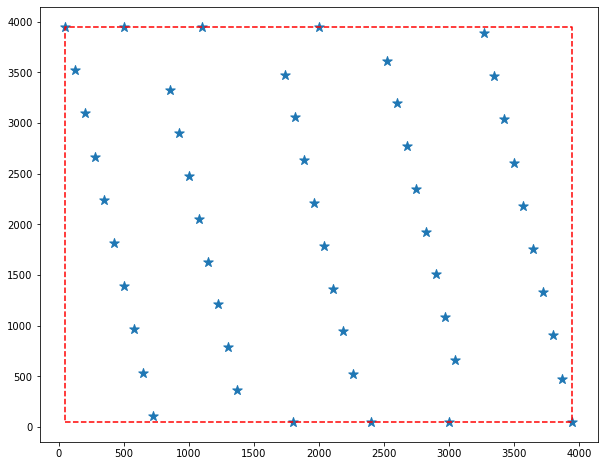

In [72]:
angle = 80
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
# data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)])
# data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
middle_points  = np.array([[i,j] for i in np.linspace(500,3500,8) for j in [1100,2000,2800]])
rotated_middle = rotate_points(middle_points,(2000,2000),angle)
rotated2 = rotate_points(data1,(51,3949),350)
rotated3 = rotate_points(data3,(3949,51),350)
remaining = [[500,3949],[1100,3949],[2000,3949],[1800,51],[2400,51],[3000,51]]
data = np.concatenate([rotated_middle,rotated2,rotated3,remaining]) 
print(data.shape)
    
#     save_df(data[:,0],data[:,1],'rotated_best' + str(angle))
plot_turbines(data[:,0],data[:,1])

In [73]:
checkConstraints(data)

Both perimeter and proximity constraints are satisfied !!



[]

In [74]:
save_df(data[:,0],data[:,1],'rotated_manually')


(56, 2)


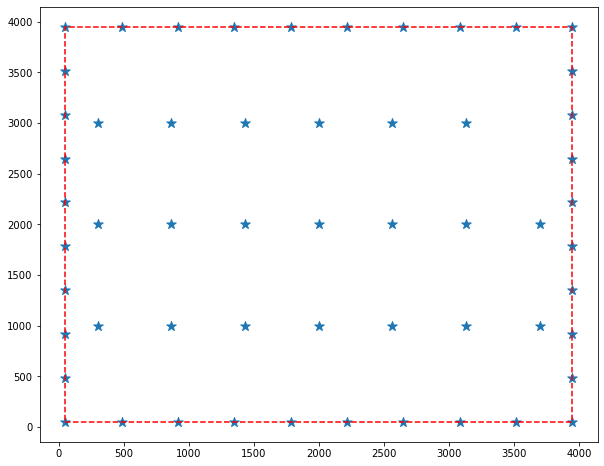

In [39]:
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(51,3949,10)[1:-1]])
data4 = np.array([[i,3949] for i in np.linspace(484.11111,3949,9)])
data5 = np.array([[i,j] for i in np.linspace(300,3700,7) for j in [1000,2000,3000]])[:-1]
data = np.concatenate([data1,data2,data3,data4,data5]) 
print(data.shape)
plot_turbines(data[:,0],data[:,1])

# Rotating another data points

(32, 2)


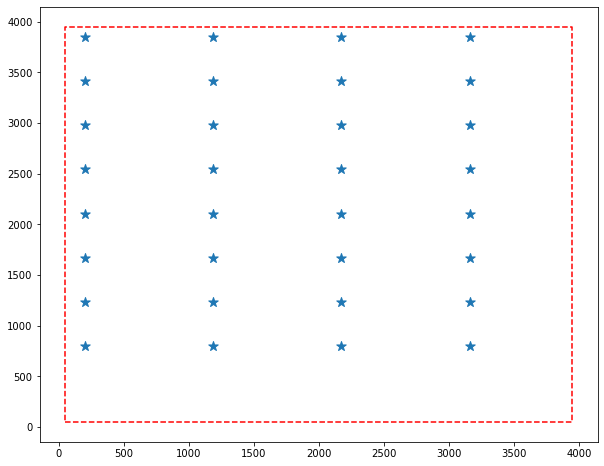

In [204]:
data = np.array([[a,b] for a in np.linspace(200,4150, 5)[:-1] for b in np.linspace(800, 3849, 8)])

# data1 = rotate_points(data2,(2000,2000),80)
print(data.shape)
#     save_df(data[:,0],data[:,1],'rotated_best' + str(angle))
plot_turbines(data[:,0],data[:,1])

(32, 2)


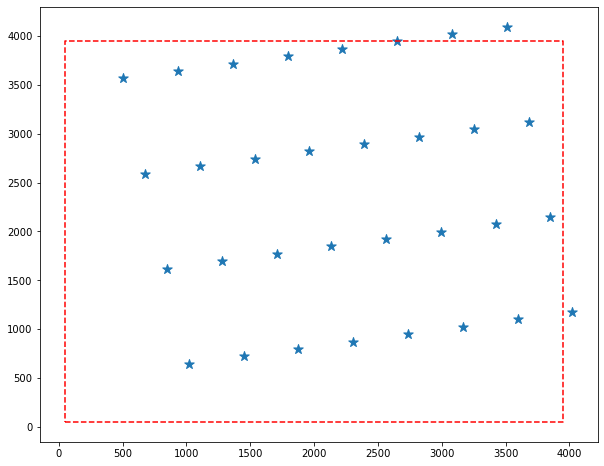

In [205]:
data1 = rotate_points(data,(2000,2000),80)
print(data1.shape)
#     save_df(data[:,0],data[:,1],'rotated_best' + str(angle))
plot_turbines(data1[:,0],data1[:,1])

In [206]:
# to select only the points that are inside the farm with perimeter condition
# this is taken from the check constrains function

bound_clrnc      = 50


# create a shapely polygon object of the wind farm
farm_peri = [(0, 0), (0, 4000), (4000, 4000), (4000, 0)]
farm_poly = Polygon(farm_peri)

# checks if for every turbine perimeter constraint is satisfied. 
# breaks out if False anywhere
selected_points = []
for turb in data1:
    point = turb
    turb = Point(turb)
    inside_farm   = farm_poly.contains(turb)
    correct_clrnc = farm_poly.boundary.distance(turb) >= bound_clrnc
    if not (inside_farm == False or correct_clrnc == False):
        selected_points.append(point)

(50, 2)
(50, 2)
(50, 2)


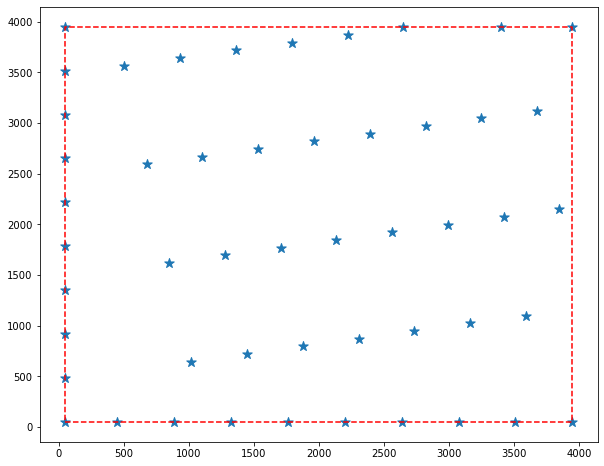

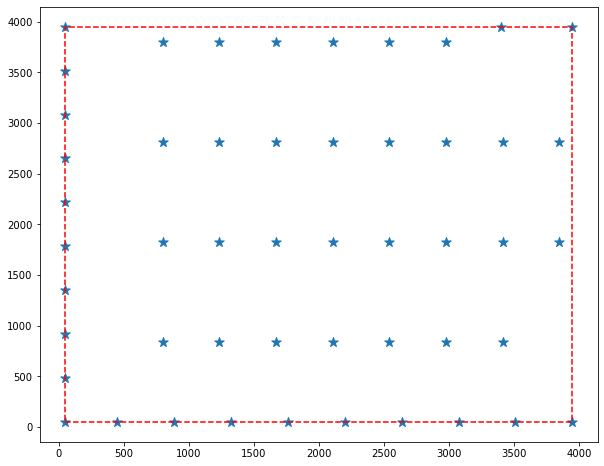

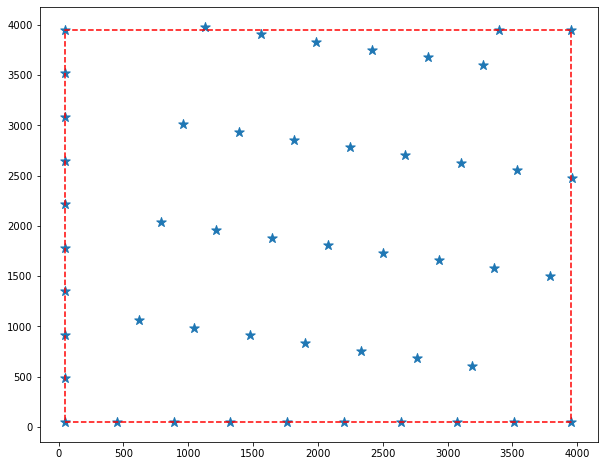

In [217]:
for angle in np.arange(0,30,10):
    middle_points = np.array(selected_points)
    data2 = np.array([[50,i] for i in np.linspace(51,3950,10)] )
    data3 = np.array([[i,50] for i in np.linspace(451,3950,9)])
    data4 = np.array([[i,3950] for i in np.linspace(3400,3950,2)])
    rotated_points = rotate_points(middle_points,(2000,2000),angle)
    data = np.concatenate([rotated_points,data2,data3,data4]) 
    print(data.shape)

    plot_turbines(data[:,0],data[:,1])
    save_df(data[:,0],data[:,1],'new_rotated'+str(angle) )



In [208]:
checkConstraints(data1)

Both perimeter and proximity constraints are satisfied !!



[]

(50, 2)


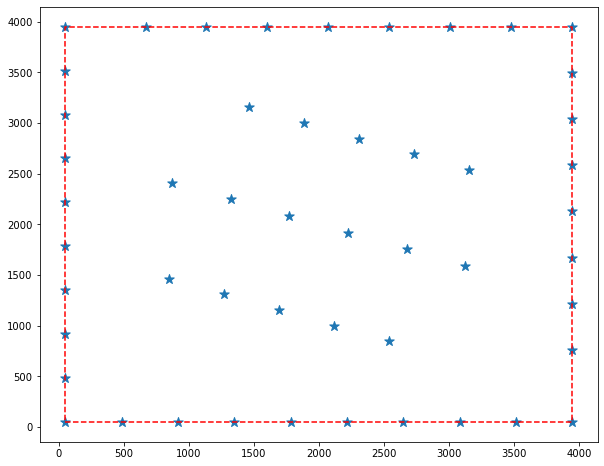

In [116]:
angle = 200
data1 = np.array([[51,i] for i in np.linspace(51,3950,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3950,9)[:-1]])
data3 = np.array([[3949,i] for i in np.linspace(-150,3950,10)[2:-1]])
data4 = np.array([[i,3949] for i in np.linspace(200.11111,3949,9)[1:]])
middle_points1  = np.array([[i,1100] for i in np.linspace(1100,2900,5)])
middle_points2  = np.array([[i,2000] for i in np.linspace(3200,800,6)])
middle_points3  = np.array([[i,2900] for i in np.linspace(1100,2900,5)])


rotated_middle1 = rotate_points(middle_points1,(2000,2000),angle)
rotated_middle2 = rotate_points(middle_points2,(2000,2000),angle)
rotated_middle3 = rotate_points(middle_points3,(2000,2000),angle)

data_remaining = [[3950,50]]
data = np.concatenate([data1,data2,data3,data4,rotated_middle1,rotated_middle2,rotated_middle3,data_remaining]) 
print(data.shape)

save_df(data[:,0],data[:,1],'new_rotated_best' + str(angle))

plot_turbines(data[:,0],data[:,1])

(50, 2)


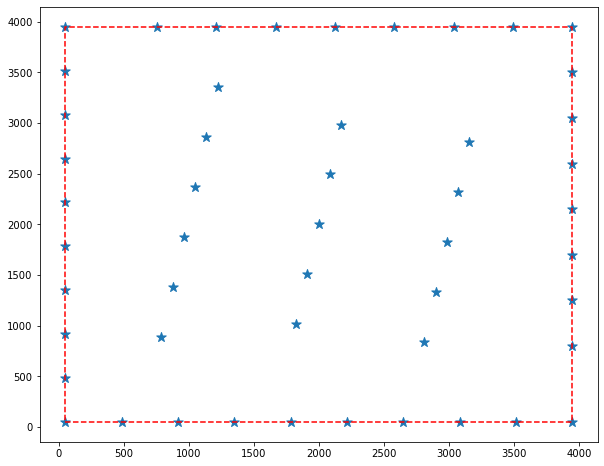

In [149]:
angle = 100
data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
data3 = np.array([[3949,i] for i in np.linspace(-100,3949,10)[2:-1]])
data4 = np.array([[i,3949] for i in np.linspace(300.11111,3949,9)[1:]])

middle_points1  = np.array([[i,2000] for i in np.linspace(1000,3000,5)])
middle_points2  = np.array([[i,1000] for i in np.linspace(800,3300,6)])
middle_points3  = np.array([[i,3000] for i in np.linspace(1000,3000,5)])


rotated_middle1 = rotate_points(middle_points1,(2000,2000),angle)
rotated_middle2 = rotate_points(middle_points2,(2000,2000),angle)
rotated_middle3 = rotate_points(middle_points3,(2000,2000),angle)

# remaining_points = np.array([[2750,3550]])
data = np.concatenate([data1,data2,data3,data4,rotated_middle1,rotated_middle2,rotated_middle3]) 
print(data.shape)

save_df(data[:,0],data[:,1],'rotated_best' + str(angle))

plot_turbines(data[:,0],data[:,1])


(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)
(50, 2)


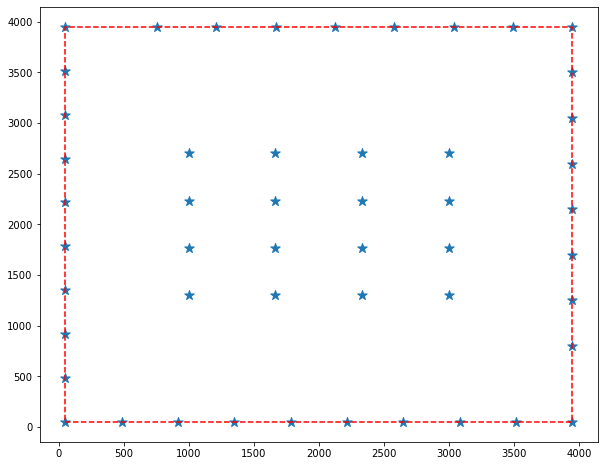

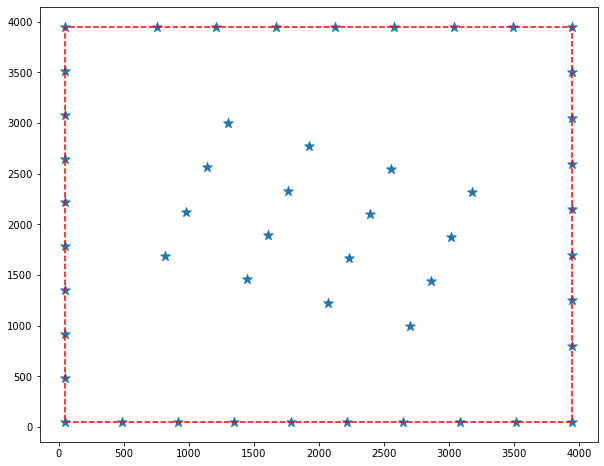

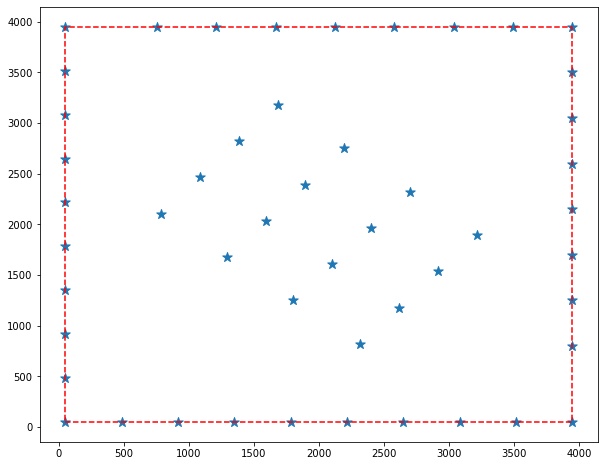

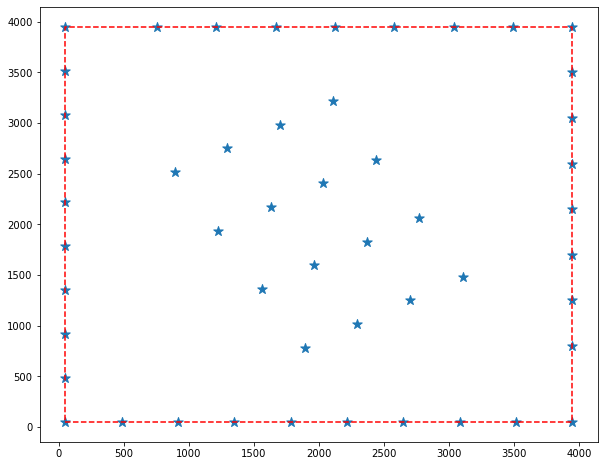

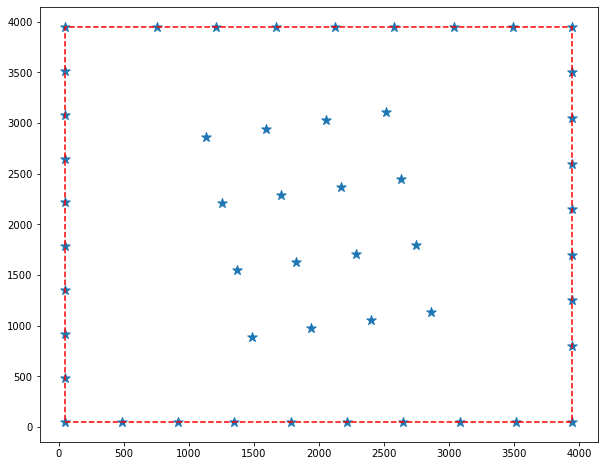

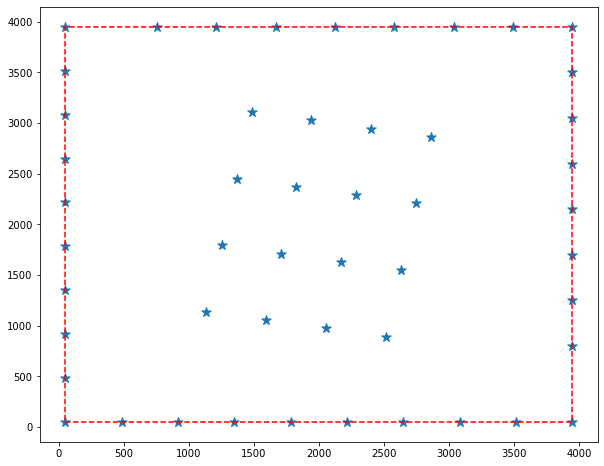

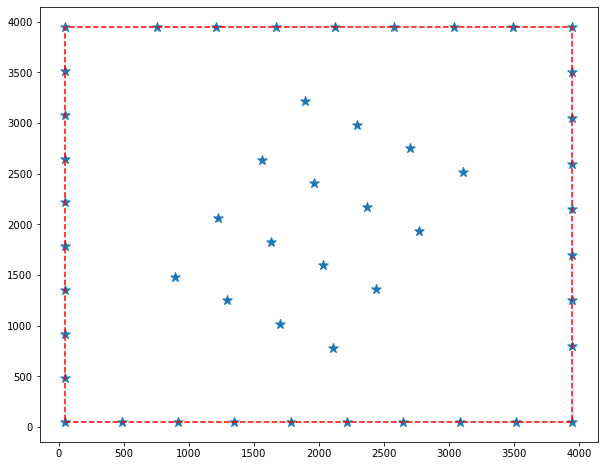

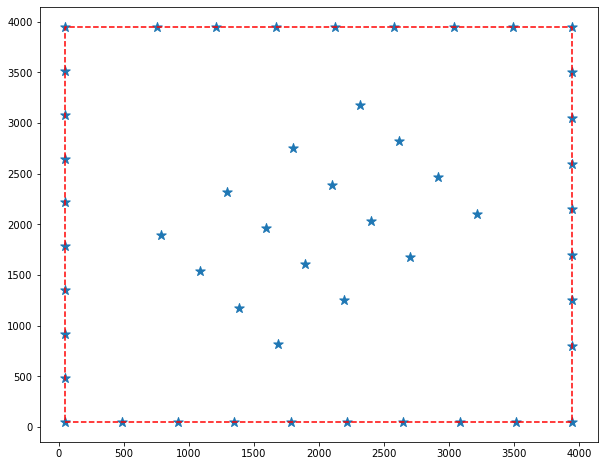

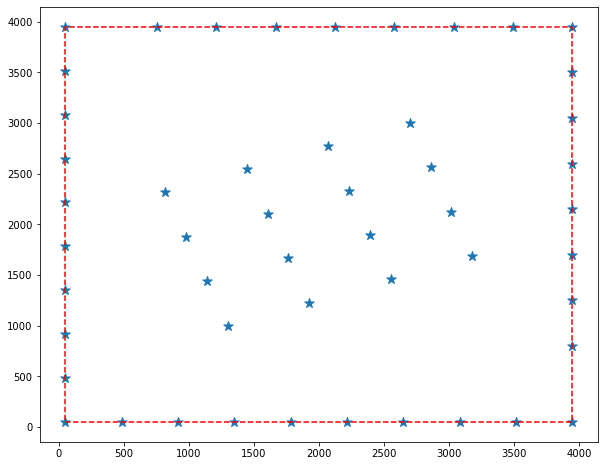

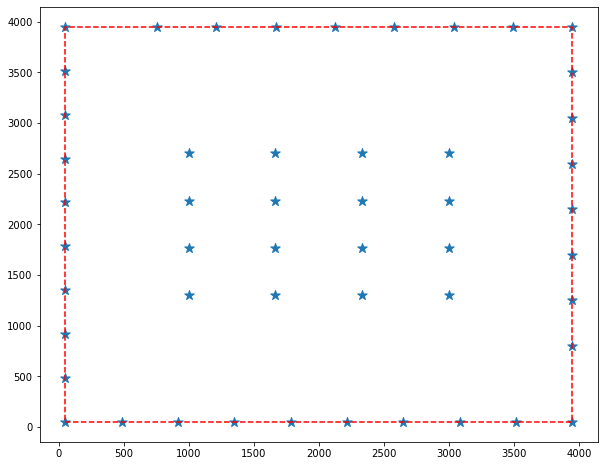

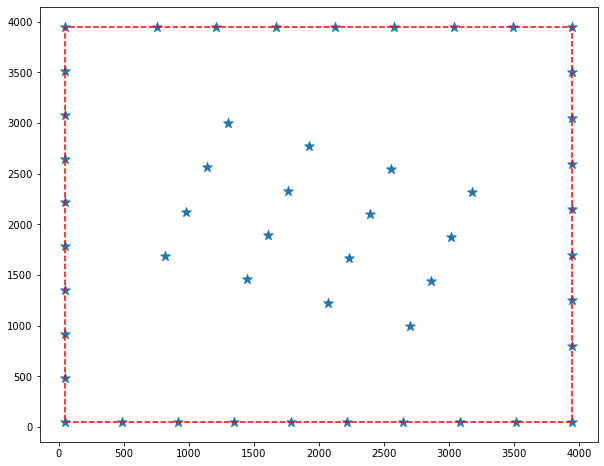

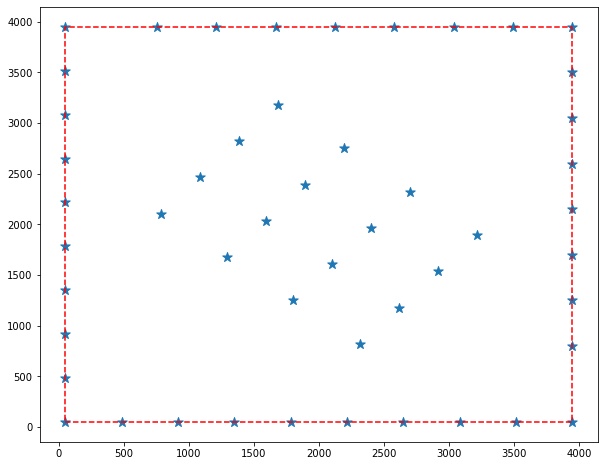

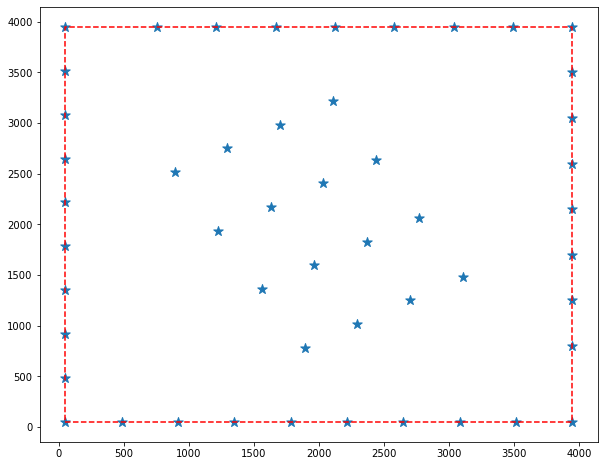

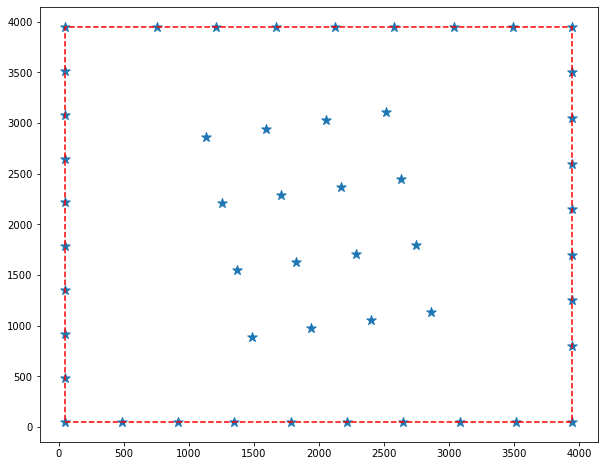

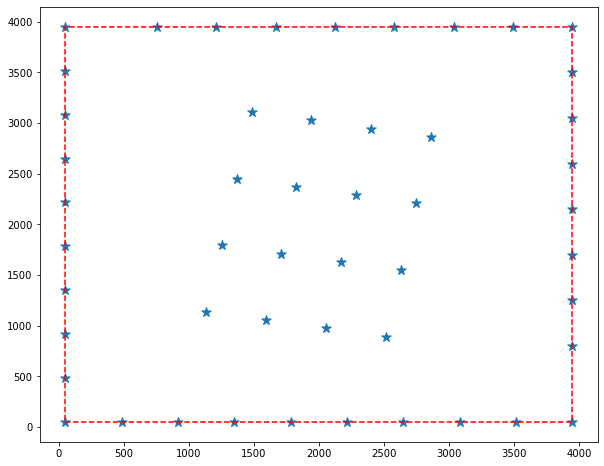

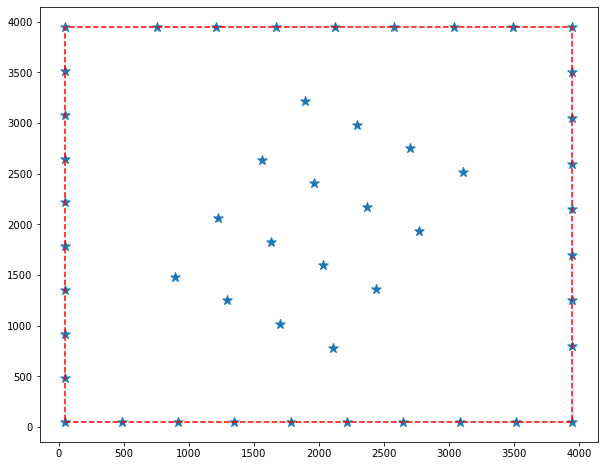

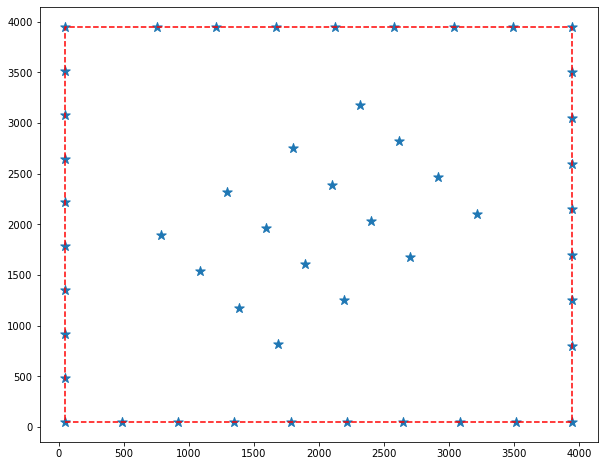

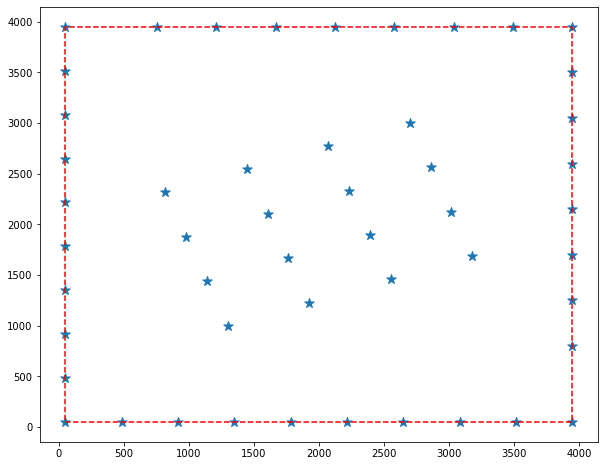

In [160]:
for angle in range(0,360,20):    
    data1 = np.array([[51,i] for i in np.linspace(51,3949,10)])
    data2 = np.array([[i,51] for i in np.linspace(484.11111,3949,9)])
    data3 = np.array([[3949,i] for i in np.linspace(-100,3949,10)[2:-1]])
    data4 = np.array([[i,3949] for i in np.linspace(300.11111,3949,9)[1:]])

    middle_points  = np.array([[i,j] for i in np.linspace(1000,3000,4) for j in np.linspace(1300,2700,4)])
    rotated_middle = rotate_points(middle_points,(2000,2000),angle)

    # remaining_points = np.array([[2750,3550]])
    data = np.concatenate([data1,data2,data3,data4,rotated_middle]) 
    print(data.shape)

    save_df(data[:,0],data[:,1],'4_4_' + str(angle))

    plot_turbines(data[:,0],data[:,1])